In [3]:
import matplotlib.pyplot as plt
import skimage 
import tifffile
import numpy as np
from skimage import img_as_ubyte, io

# Plot images


In [4]:
# Define paths

img_real_path = r'/home/hmorales/Documents/OverSaturation_examples/example_5.2.08.tif'
img_bio_path = r'/home/hmorales/Documents/OverSaturation_examples/nuclei2.tif'


# Image Normalization
min_v = 0
max_v = 255



def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

510.0


/tmp/ipykernel_59506/1120250197.py:29: UserWarning: /home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_reconstructed_01_full.tif is a low contrast image
  io.imsave(outname, img_original)
/tmp/ipykernel_59506/1120250197.py:72: UserWarning: /home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_reconstructed_01_small.tif is a low contrast image
  io.imsave(outname, img_original)
/tmp/ipykernel_59506/1120250197.py:118: UserWarning: /home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_reconstructed_01_tiny.tif is a low contrast image
  io.imsave(outname, img_original)


(0.0, 510.0)

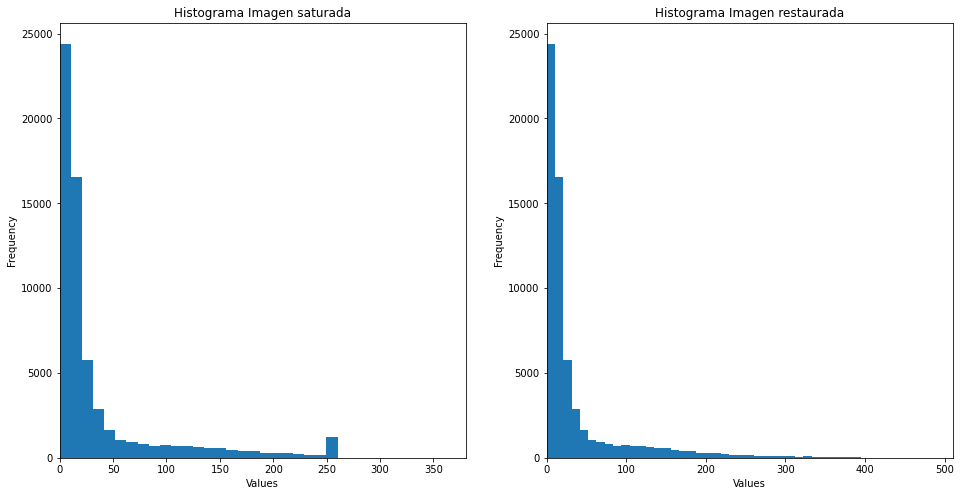

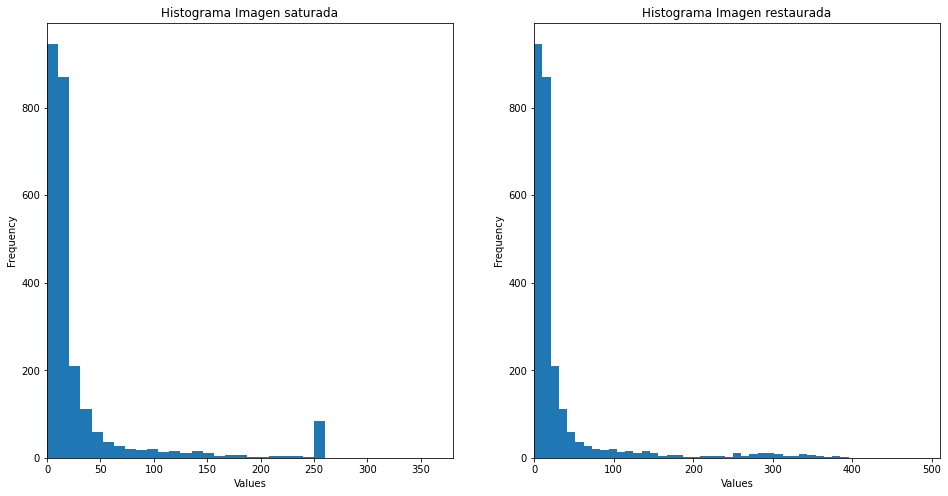

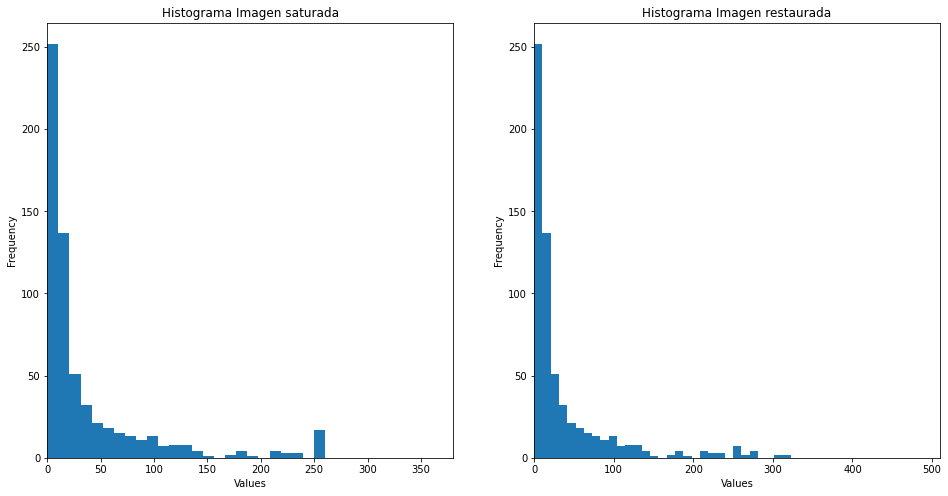

In [5]:

saturation = 2.0 #1.2 for membranes  # 2 for nuclei

img  =  tifffile.imread(img_bio_path)
img = np.squeeze(img)


img_original = convert(img, 0, 255, np.float32)
img_original = img_original.astype(np.float32) 
img_original *= saturation 
img_max = np.amax(img_original)


img_saturated = np.copy(img_original)
img_saturated[img_saturated > 255] = 255
img_saturated = convert(img_saturated, 0, 255, np.uint8)

img_max = np.amax(img_original)
print(img_max)

outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_saturated_01_full.tif' 
io.imsave(outname, img_saturated)

img_flat = img_saturated.flatten()
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_saturated_01_full.csv' 
np.savetxt(outname, img_flat)

img_original = img_original.astype(np.uint16)
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_reconstructed_01_full.tif' 
io.imsave(outname, img_original)

img_flat = img_original.flatten()
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_reconstructed_01_full.csv' 
np.savetxt(outname, img_flat)


# Histograms

plt.figure(figsize=(16,8))
# Plot the histogram

bin_edges = np.linspace(0, img_max, 50)

plt.subplot(1,2,1)

plt.hist(img_saturated.flatten(), bins=bin_edges)
plt.title('Histograma Imagen saturada')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, 380)

plt.subplot(1,2,2)

plt.hist(img_original.flatten(), bins=bin_edges)
plt.title('Histograma Imagen restaurada')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, img_max) 



# cropped
img_saturated = img_saturated[180:230, 135:185]
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_saturated_01_small.tif' 
io.imsave(outname, img_saturated)

img_flat = img_saturated.flatten()
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_saturated_01_small.csv' 
np.savetxt(outname, img_flat)

img_original = img_original[180:230, 135:185]
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_reconstructed_01_small.tif' 
io.imsave(outname, img_original)

img_flat = img_original.flatten()
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_reconstructed_01_small.csv' 
np.savetxt(outname, img_flat)


# Histograms

plt.figure(figsize=(16,8))
# Plot the histogram

bin_edges = np.linspace(0, img_max, 50)

plt.subplot(1,2,1)

plt.hist(img_saturated.flatten(), bins=bin_edges)
plt.title('Histograma Imagen saturada')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, 380)

plt.subplot(1,2,2)

plt.hist(img_original.flatten(), bins=bin_edges)
plt.title('Histograma Imagen restaurada')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, img_max) 





# cropped tiny
img_saturated = img_saturated[0:25,20:45]
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_saturated_01_tiny.tif' 
io.imsave(outname, img_saturated)

img_flat = img_saturated.flatten()
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_saturated_01_tiny.csv' 
np.savetxt(outname, img_flat)


img_original = img_original[0:25,20:45]
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_reconstructed_01_tiny.tif' 
io.imsave(outname, img_original)

img_flat = img_original.flatten()
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_reconstructed_01_tiny.csv' 
np.savetxt(outname, img_flat)


# Histograms

plt.figure(figsize=(16,8))
# Plot the histogram

bin_edges = np.linspace(0, img_max, 50)

plt.subplot(1,2,1)

plt.hist(img_saturated.flatten(), bins=bin_edges)
plt.title('Histograma Imagen saturada')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, 380)

plt.subplot(1,2,2)

plt.hist(img_original.flatten(), bins=bin_edges)
plt.title('Histograma Imagen restaurada')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, img_max) 

In [ ]:
import pandas as pd

# Import
df = pd.read_csv('/home/hmorales/Documents/OverSaturation_examples/newResults/nuclei_saturated_01_full.csv', header=None)

# Convert to array
data = df.iloc[:, 0].values

# Convert to image
image_data = data.reshape(250, 250)

# Plot
plt.figure(figsize=(16,8))
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

In [ ]:
# Example digital images

img  =  tifffile.imread(img_bio_path)


img = img[1,:,:]
img = np.squeeze(img)
img = convert(img, 0, 255, np.uint8)

# whole image
plt.figure(figsize=(16,8))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/image_nuclei_full.svg' 
plt.savefig(outname, bbox_inches='tight', dpi=300)  
plt.show()

#zoom in
plt.figure(figsize=(16,8))
plt.imshow(img[225:240, 275:290], cmap='gray', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/image_nuclei_zoom.svg' 
plt.savefig(outname, bbox_inches='tight', dpi=300)  
plt.show()


# overlap values

image_data = img[225:240, 275:290]
plt.figure(figsize=(16,8))
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        plt.text(j, i, str(image_data[i, j]), ha='center', va='center', color='red')

outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/image_nuclei_zoom_with_values.svg' 
plt.savefig(outname, bbox_inches='tight', dpi=300)  
plt.show()


In [ ]:
# Images Examples bits

img  =  tifffile.imread(img_bio_path)
img = img[1,:,:]
img = np.squeeze(img)

img8bit = convert(img, 0, 255, np.uint8)
img4bit = convert(img, 0, 15, np.uint8)
img2bit = convert(img, 0, 3, np.uint8)

# Whole iimage
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('8-bits \n  256 niveles de gris')  
plt.imshow(img8bit, cmap='gray', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('4-bits \n  16 niveles de gris')  
plt.imshow(img4bit, interpolation="none", cmap='gray', vmin=0, vmax=15)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(1,3,3)
plt.title('2-bits \n  4 niveles de gris')  
plt.imshow(img2bit, interpolation="none", cmap='gray', vmin=0, vmax=3)
plt.colorbar(fraction=0.046, pad=0.04) 
plt.axis('off')


outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/image_bits.svg' 
plt.savefig(outname, bbox_inches='tight', dpi=300)  
plt.show()



#Inset

img8bit = img8bit[200:300, 200:300]
img4bit = img4bit[200:300, 200:300]
img2bit = img2bit[200:300, 200:300]

plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('8-bits \n  256 niveles de gris')  
plt.imshow(img8bit, cmap='gray', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('4-bits \n  16 niveles de gris')  
plt.imshow(img4bit, interpolation="none", cmap='gray', vmin=0, vmax=15)
plt.colorbar(fraction=0.046, pad=0.04) 
plt.axis('off')

plt.subplot(1,3,3)
plt.title('2-bits \n  4 niveles de gris')  
plt.imshow(img2bit, interpolation="none", cmap='gray', vmin=0, vmax=3)
plt.colorbar(fraction=0.046, pad=0.04)  
plt.axis('off')

outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/image_bits_zoom.svg' 
plt.savefig(outname, bbox_inches='tight', dpi=300)  
plt.show()


In [ ]:
# Create saturaed images nuclei


saturation = 20.0

img  =  tifffile.imread(img_bio_path)
#img = img[1,:,:]
img = np.squeeze(img)
#img = img[200:300, 200:300]


img8bit = convert(img, 0, 255, np.float32)
img8bit = img8bit.astype(np.float32) 
img8bit *= saturation 
img_max = np.amax(img8bit)


img_saturated = np.copy(img8bit)
img_saturated[img_saturated > 255] = 255
img_saturated = convert(img_saturated, 0, 255, np.uint8)

img_max = np.amax(img8bit)
print(img_max)

matrix_8bit = img_as_ubyte(img_saturated)
outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/beads_saturated_01.tif' 
io.imsave(outname, img_saturated)

img_max = 500

# Whole iimage
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Imagen saturada')  
plt.imshow(img_saturated, interpolation="none", cmap='gray', vmin=0, vmax=img_max)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Imagen restaurada \n sin saturacion')  
plt.imshow(img8bit, cmap='gray', vmin=0, vmax=img_max)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')


outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/imagenes_nuclei_saturadas.svg' 
plt.savefig(outname, bbox_inches='tight', dpi=300)  
plt.show()


# Histograms

plt.figure(figsize=(16,8))
# Plot the histogram

bin_edges = np.linspace(0, img_max, 50)

plt.subplot(1,2,1)

plt.hist(img_saturated.flatten(), bins=bin_edges)
plt.title('Histograma Imagen saturada')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, 380)

plt.subplot(1,2,2)

plt.hist(img8bit.flatten(), bins=bin_edges)
plt.title('Histograma Imagen restaurada')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, img_max) 

outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/imagenes_nuclei_saturadas_histogramas.svg' 
plt.savefig(outname, bbox_inches='tight', dpi=300)  
plt.show()


In [ ]:
# Create saturaed images real


saturation = 1.5

img  =  tifffile.imread(img_real_path)
img = np.squeeze(img)


img8bit = convert(img, 0, 255, np.float32)
img8bit = img8bit.astype(np.float32) 
img8bit *= saturation 
img_max = np.amax(img8bit)


img_saturated = np.copy(img8bit)
img_saturated[img_saturated > 255] = 255
img_saturated = convert(img_saturated, 0, 255, np.uint8)

img_max = np.amax(img8bit)
print(img_max)

img_max = 350

# Whole iimage
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Imagen saturada')  
plt.imshow(img_saturated, interpolation="none", cmap='gray', vmin=0, vmax=255)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Imagen restaurada \n sin saturacion')  
plt.imshow(img8bit, cmap='gray', vmin=0, vmax=img_max)
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')


outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/imagenes_real_saturadas.svg' 
plt.savefig(outname, bbox_inches='tight', dpi=300)  
plt.show()


# Histograms

plt.figure(figsize=(16,8))
# Plot the histogram

bin_edges = np.linspace(0, img_max, 50)

plt.subplot(1,2,1)

plt.hist(img_saturated.flatten(), bins=bin_edges)
plt.title('Histograma Imagen saturada')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, 380)

plt.subplot(1,2,2)

plt.hist(img8bit.flatten(), bins=bin_edges)
plt.title('Histograma Imagen restaurada')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, img_max) 

outname =  '/home/hmorales/Documents/OverSaturation_examples/newResults/imagenes_real_saturadas_histogramas.svg' 
plt.savefig(outname, bbox_inches='tight', dpi=300)  
plt.show()

In [ ]:
# Load image

img  =  tifffile.imread(img_bio_path).astype(np.float32)
img =   2.0 * img[1,:,:] / 255.0
img = np.squeeze(img)


img_ss  =  tifffile.imread(img_bio_path).astype(np.float32)
img_ss =   2.0 * img_ss[1,:,:] / 255.0
img_ss = np.squeeze(img_ss)
img_ss[img_ss > 255] = 255


img_min = np.amin(img)
img_max = np.amax(img)	
print('Intensity  (%d, %d) ' % (img_min, img_max))
print('Variable Type: ', type(img))
print('Image data type: ', img.dtype)
print('Image dimension: ', img.shape)



def pltPair(img1, img2, title1, title2, cmap1, cmap2, lim, outname):
    """This function displays a pair of input image with interpolation='none',in the range of lims. """

    plt.figure(figsize=(16,16))    
    plt.subplot(1,2,1)    
    plt.imshow(img1, interpolation='none', cmap=cmap1, vmin=lim[0], vmax=lim[1])
    plt.title(title1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis('off')
    plt.subplot(1,2,2)        
    plt.imshow(img2, interpolation='none', cmap=cmap2, vmin=lim[2], vmax=lim[3])
    plt.title(title2)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis('off')
    #plt.show()    
    plt.savefig(outname, bbox_inches='tight', dpi=300)  


outname =  '/home/hmorales/Documents/OverSaturation_examples/nuclei_picture.svg'   
pltPair(img, img_ss, '9-bit image', '8-bit image (saturated)', 'magma', 'magma', [min_v,2*max_v,min_v,2*max_v], outname)    
    
outname =  '/home/hmorales/Documents/OverSaturation_examples/nuclei_zoom.svg'   
pltPair(img[200:300, 200:300], img_ss[200:300,200:300], '9-bit image', '8-bit image (saturated)', 'magma', 'magma', [min_v,2*max_v,min_v,2*max_v], outname)    
   
 

    
    


In [ ]:
# Load image

img  =  tifffile.imread(img_real_path).astype(np.float32)
img =   2.0 * img / 256.0


img_ss  =  tifffile.imread(img_bio_path).astype(np.float32)
img_ss =   2.0 * img_ss / 256.0
img_ss[img_ss > 255] = 255


img_min = np.amin(img)
img_max = np.amax(img)
print('Intensity  (%d, %d) ' % (img_min, img_max))
print('Variable Type: ', type(img))
print('Image data type: ', img.dtype)
print('Image dimension: ', img.shape)



def pltPair(img1, img2, title1, title2, cmap1, cmap2, lim, outname):
    """This function displays a pair of input image with interpolation='none',in the range of lims. """

    plt.figure(figsize=(16,16))    
    plt.subplot(1,2,1)    
    plt.imshow(img1, interpolation='none', cmap=cmap1, vmin=lim[0], vmax=lim[1])
    plt.title(title1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis('off')
    plt.subplot(1,2,2)        
    plt.imshow(img2, interpolation='none', cmap=cmap2, vmin=lim[2], vmax=lim[3])
    plt.title(title2)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis('off')
    #plt.show()    
    plt.savefig(outname, bbox_inches='tight', dpi=300)  


outname =  '/home/hmorales/Documents/OverSaturation_examples/real.svg'   
pltPair(img, img, '9-bit image', '8-bit image (saturated)', 'gray', 'gray', [min_v,2*max_v,min_v,max_v], outname)    
    
outname =  '/home/hmorales/Documents/OverSaturation_examples/real_zoom.svg'   
pltPair(img[100:200, 100:200], img[100:200,100:200], '9-bit image', '8-bit image (saturated)', 'gray', 'gray', [min_v,2*max_v,min_v,max_v], outname)    
   
 

